In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Credit_Card_Customer_Data.csv")

In [3]:
df.head(n=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.drop(['Sl_No'], axis=1, inplace=True)

In [6]:
df['Customer Key'].nunique()

655

In [7]:
df.drop(['Customer Key'], axis=1, inplace=True)

In [8]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [9]:
df.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
df.shape

(660, 5)

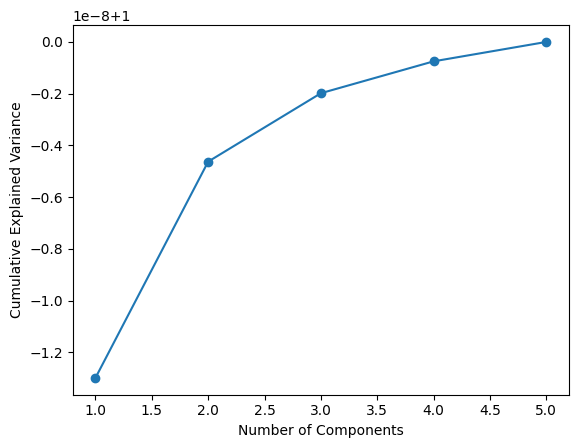

In [11]:
pca = PCA()

pca.fit(df)

explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

plt.figure()
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

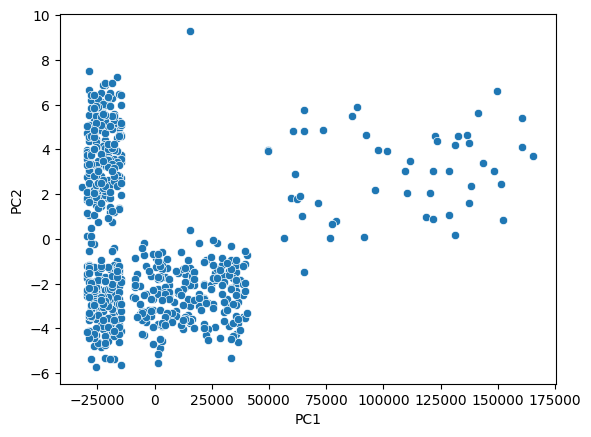

In [14]:
pca_2d  = PCA(n_components=2)
pca_2d_data =  pca_2d.fit_transform(df)

pca_2d_df = pd.DataFrame(pca_2d_data, columns=['PC1', 'PC2'])

sns.scatterplot(data = pca_2d_df, x= "PC1", y="PC2")
plt.show()

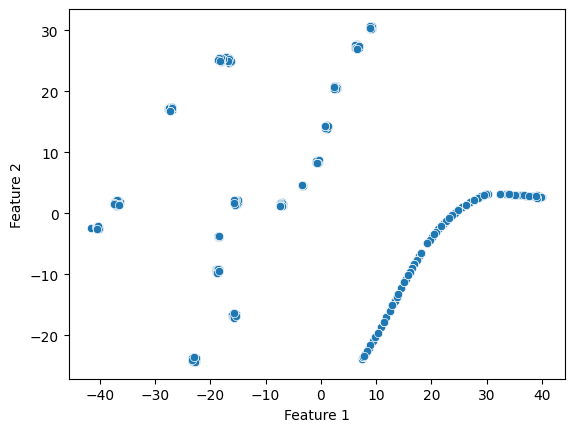

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

tsne_reduced_data = tsne.fit_transform(df)

tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=["Feature 1", "Feature 2"])

sns.scatterplot(data=tsne_2d_data, x= "Feature 1", y = "Feature 2")
plt.show()

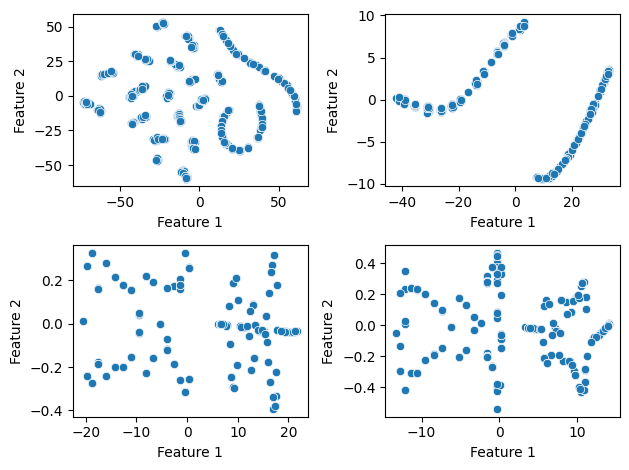

In [17]:
perplexity = [10, 50, 100, 150]

plt.figure()

for i in range(len(perplexity)):
    tnse = TSNE(n_components=2, perplexity=perplexity[i])
    tsne_reduced_data = tnse.fit_transform(df)
    red_data_df = pd.DataFrame(tsne_reduced_data, columns=['Feature 1', 'Feature 2'])

    plt.subplot(2,2, i+1)
    sns.scatterplot(data = red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout()

plt.show()
